In [3]:
import cv2
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import cv2
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os

path = "myData"
imageDimensions = (32, 32, 3)
images = []     
classNo = []    

myList = os.listdir(path)
print("Total Classes Detected:", len(myList))
noOfClasses = len(myList)
print("Importing Classes .......")
for x in range(0, noOfClasses):
    myPicList = os.listdir(path + "/" + str(x))
    for y in myPicList:
        curImg = cv2.imread(path + "/" + str(x) + "/" + y)
        curImg = cv2.resize(curImg, (32, 32))
        images.append(curImg)
        classNo.append(x)
    print(x, end=" ")

print(" ")
print("Total Images in Images List = ", len(images))
print("Total IDs in classNo List= ", len(classNo))

# Step 1: Load dataset
labels = classNo

Total Classes Detected: 10
Importing Classes .......
0 1 2 3 4 5 6 7 8 9  
Total Images in Images List =  10160
Total IDs in classNo List=  10160


In [8]:
def extract_hog_features(images):
    hog = cv2.HOGDescriptor()
    hog_features = []
    for img in images:
        # Convert the image to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Resize the image to a standard size if necessary
        resized_img = cv2.resize(gray_img, (64, 128))  # Default HOG window size
        # Compute HOG features
        hog_feature = hog.compute(resized_img)
        hog_features.append(hog_feature)
    return np.array(hog_features)


# Extract HOG features
hog_features = extract_hog_features(images)

In [9]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

In [11]:
import matplotlib.pyplot as plt

In [13]:
#Train Decision Tree model
def train_model(X_train, y_train):
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    return dt


In [14]:
# Train Decision Tree model
dt_model = train_model(X_train, y_train)

In [15]:
# Evaluate model
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9409448818897638


Predicted Digit: 9


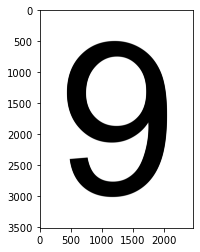

In [23]:
import cv2
import numpy as np

# Load the trained model
# Assuming you have trained your model and stored it in dt_model

# Function to predict digit from an image
def predict_digit(image_path, model):
    # Load the test image
    test_img = cv2.imread(image_path)
    
    # Preprocess the image (resize, convert to grayscale, etc.)
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_img, (64, 128))  # Resize to match HOG feature size
    
    # Extract HOG features
    hog = cv2.HOGDescriptor()
    hog_feature = hog.compute(resized_img)
    
    # Reshape HOG feature array to match the format expected by the model
    hog_feature = hog_feature.reshape(1, -1)
    
    # Predict digit using the trained model
    digit_prediction = model.predict(hog_feature)
    plt.imshow(test_img)
    return digit_prediction[0]

# Example usage
image_path = "C:\\Users\\RITIKA\\Desktop\\2nd year\\sem 4\\Sodoku project\\abcd.webp"  # Replace with the path to your test image
predicted_digit = predict_digit(image_path, dt_model)
print("Predicted Digit:", predicted_digit)

In [29]:
from sklearn.metrics import classification_report
# Compute classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       221
           1       0.93      0.91      0.92       206
           2       0.91      0.93      0.92       200
           3       0.96      0.94      0.95       217
           4       0.98      0.95      0.96       201
           5       0.93      0.97      0.95       190
           6       0.94      0.94      0.94       203
           7       0.90      0.92      0.91       198
           8       0.95      0.95      0.95       200
           9       0.96      0.93      0.95       196

    accuracy                           0.94      2032
   macro avg       0.94      0.94      0.94      2032
weighted avg       0.94      0.94      0.94      2032



Predicted Digit: 3


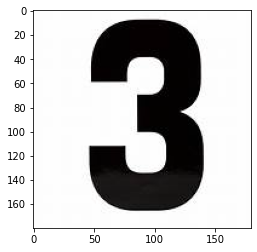

In [18]:
import cv2
import numpy as np

# Load the trained model
# Assuming you have trained your model and stored it in dt_model

# Function to predict digit from an image
def predict_digit(image_path, model):
    # Load the test image
    test_img = cv2.imread(image_path)
    
    # Preprocess the image (resize, convert to grayscale, etc.)
    gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_img, (64, 128))  # Resize to match HOG feature size
    
    # Extract HOG features
    hog = cv2.HOGDescriptor()
    hog_feature = hog.compute(resized_img)
    
    # Reshape HOG feature array to match the format expected by the model
    hog_feature = hog_feature.reshape(1, -1)
    
    # Predict digit using the trained model
    digit_prediction = model.predict(hog_feature)
    plt.imshow(test_img)
    return digit_prediction[0]

# Example usage
image_path = "C:\\Users\\RITIKA\\Desktop\\2nd year\\sem 4\\Sodoku project\\three.jpeg"  # Replace with the path to your test image
predicted_digit = predict_digit(image_path, dt_model)
print("Predicted Digit:", predicted_digit)

In [24]:
import pickle
# Save the trained model
with open('decision_tree_hog_model.pkl', 'wb') as file:
    pickle.dump(dt_model, file)